## Лабораторная работа 2

### I. Нахождение числовых характеристик различных распределений.

    excess   - коэффициент эксцесса.
    skewness - коэффициент ассиметрии.
    median   - медиана.
    cov      - коэффициент вариации.
    variance - дисперсия.
    expect   - математическое ождиание.
    quant1   - квантиль 1/3.
    quant2   - квантиль 3/4.

In [4]:
import numpy as np
import scipy.stats as stat
import matplotlib.pyplot as plt

In [22]:
def print_data(data):
    size = np.size(data)
    print(f'excess:   {stat.moment(data, 4) / stat.moment(data, 2) ** 2}')
    print(f'skewness: {stat.kstat(data, 3) / stat.kstat(data, 2) ** 1.5}')
    print(f'median:   {(data[size // 2 - 1] + data[size // 2]) / 2}')
    print(f'cov:      {np.var(data) ** 0.5 / np.mean(data)}')
    print(f'variance: {np.var(data)}')
    print(f'expect:   {np.mean(data)}')
    print(f'quant1:   {np.quantile(data, 1 / 3)}')
    print(f'quant2:   {np.quantile(data, 1 / 4)}')

#### 1.Распределние Гаусса.

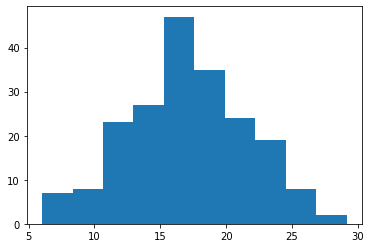

excess:   2.6780013394823126
skewness: 0.01455428193641097
median:   23.76393545973539
cov:      0.2667432466465165
variance: 20.590388544314646
expect:   17.011352273483993
quant1:   15.324290451220877
quant2:   13.72695541703824


In [6]:
n = 200
gauss_exp = 17
gauss_var = 22

gauss = stat.norm.rvs(loc=gauss_exp, scale=gauss_var**0.5,size=n)
plt.hist(gauss)
plt.show()
print_data(gauss)

#### 2.Распределение Пуассона.

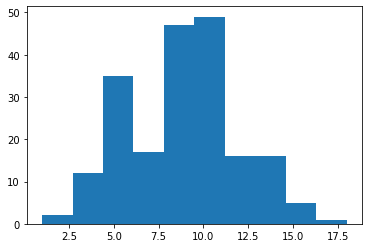

excess:   2.7174847549820553
skewness: 0.0813034271169805
median:   10.0
cov:      0.3433849569213425
variance: 9.2144
expect:   8.84
quant1:   8.0
quant2:   7.0


In [7]:
poission_param = 9
poisson = np.random.default_rng().poisson(poission_param, n)

plt.hist(poisson)
plt.show()
print_data(poisson)

#### 3.Распределение Коши

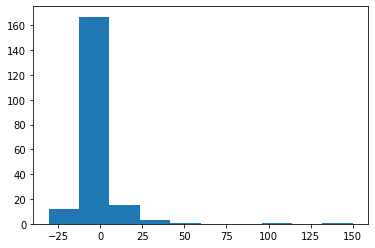

excess:   60.990182536066214
skewness: 6.644230833914385
median:   0.941237106653565
cov:      15.081521267552793
variance: 224.26709949376757
expect:   0.9929734401984263
quant1:   -1.2481733675941022
quant2:   -2.1977889155739874


In [8]:
cauchy_shift = 0
cauchy_scale = 2

cauchy = stat.cauchy.rvs(loc=cauchy_shift, scale = cauchy_scale, size=n)
plt.hist(cauchy)
plt.show()
print_data(cauchy)

#### 4.Распределение экспоненциальное

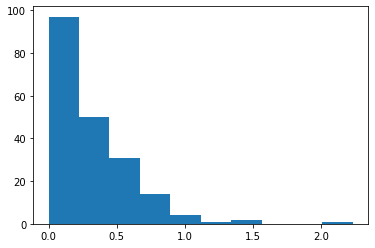

excess:   11.795941355797494
skewness: 2.2831691532791885
median:   0.48025707626376657
cov:      0.9723841712874107
variance: 0.09231334460746649
expect:   0.3124599525087887
quant1:   0.13732843361598965
quant2:   0.09730409416947523


In [9]:
exp_param = 3

exp = np.random.default_rng().exponential(1 / exp_param, n)
plt.hist(exp)
plt.show()
print_data(exp)

#### 5.Распределение равномерное.

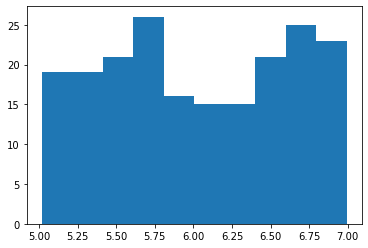

excess:   1.6895497529923753
skewness: 0.02015659049382409
median:   5.81490799344672
cov:      0.09748788961336846
variance: 0.34474939076342836
expect:   6.022836652299679
quant1:   5.648167463333113
quant2:   5.5029520769056095


In [10]:
a = 5
b = 7
uniform = np.random.default_rng().uniform(low=a, high=b, size=n)
plt.hist(uniform)

plt.show()
print_data(uniform)

### II. Интервальные оценки.

In [11]:
import math
import itertools

In [12]:
def interval_gauss_mu(data, alpha, var):
    point_expectation = np.mean(data)
    u_half_alpha = -stat.norm.ppf(alpha / 2)
    
    mu_lower = point_expectation - u_half_alpha * (var / n)**0.5
    mu_higher = point_expectation + u_half_alpha * (var / n)**0.5
    return mu_lower, mu_higher;

In [13]:
def interval_gauss_variance(data, n, alpha):
    s2 = np.var(data) * n / (n - 1)
    df = n - 1
    chi2_half_alpha = stat.chi2.ppf(alpha / 2, df)
    chi2_one_minus_half_alpha = stat.chi2.ppf(1 - alpha / 2, df)

    sigma2_lower = (n - 1) * s2 / chi2_one_minus_half_alpha
    sigma2_higher = (n - 1) * s2 / chi2_half_alpha
    return sigma2_lower, sigma2_higher

In [28]:
def interval_student_mu(data, n, alpha):
    point_expectation = np.mean(data)
    s2 = np.std(data) * n / (n - 1)
    t_half_alpha = -stat.t.ppf(q=alpha / 2, df=n-1)
    
    mu_lower = point_expectation - t_half_alpha * (s2 / n)**0.5
    mu_higher = point_expectation + t_half_alpha * (s2 / n)**0.5
    return mu_lower, mu_higher

In [33]:
def in_range(x, interval):
    a, b = interval
    if a <= x <= b:
        return True
    return False

In [45]:
def group_data(data, k):
    
    # переведем ряд в вариационный и вычислим начальную и конечную точку
    x0 = math.floor(min(data))
    xn = math.ceil(max(data))
    
    # найдем границы отрезков
    interval_size = (xn - x0) / k
    bounds = [x0 + i * interval_size for i in range(k + 1)]
    
    # выделим отрезки
    a, b = itertools.tee(bounds)
    next(b, None)
    intervals = list(zip(a, b))
    
    # найдем серидины интервалов
    intervals_mids = [(a + b) / 2 for (a, b) in intervals]
    
    grouped = np.zeros(np.size(data))
    
    for i in range(np.size(data)):
        # находим индекс интервала в который попадает точка исходной выборки
        entry_group = [j for j in range(k) if in_range(data[i], intervals[j])][0]
        # группируем, записывая в финальный массив значение серидины интервала в который попала текущая точка
        grouped[i] = intervals_mids[entry_group]
        
    return grouped

#### А. Доверительные интервалы для гауссовского распределения.

    1.Оценкка математического ожидания.

In [46]:
alpha = 0.05
gauss_exp = 4
gauss_var = 9

gauss = stat.norm.rvs(loc=gauss_exp, scale=gauss_var**0.5,size=n)
mu_lower, mu_higher = interval_gauss_mu(gauss, alpha, gauss_var)

print(f'MU- : {mu_lower} < MU: {np.mean(gauss)} < MU+: {mu_higher}')

MU- : 3.6955177263485157 < MU: 4.111288873653419 < MU+: 4.527060020958323


    2.Оценка дисперсии.

In [47]:
sigma2_lower, sigma2_higher = interval_gauss_variance(gauss, n, alpha)

print(f'VAR- : {sigma2_lower} < VAR: {np.var(gauss)} < VAR+: {sigma2_higher}')

VAR- : 7.924995153468652 < VAR: 9.5083965775598 < VAR+: 11.751369817809026


####  Б. Группированные доверительные интервалы гауссовского распределения.

    1.Оценкка математического ожидания.

In [48]:
k = 8
group_gauss = group_data(gauss, k)

mu_lower, mu_higher = interval_gauss_mu(group_gauss, alpha, gauss_var)
print(f'MU- : {mu_lower} < MU: {np.mean(group_gauss)} < MU+: {mu_higher}')

MU- : 3.7242288526950964 < MU: 4.14 < MU+: 4.555771147304903


    2.Оценка дисперсии.

In [49]:
sigma2_lower, sigma2_higher = interval_gauss_variance(group_gauss, n, alpha)
print(f'VAR- : {sigma2_lower} < VAR: {np.var(group_gauss)} < VAR+: {sigma2_higher}')

VAR- : 8.285058493401312 < VAR: 9.9404 < VAR+: 12.285280234591076


####  В. Доверительный интервал математического ожидания через квантили стьюдента.

In [50]:
mu_lower_student, mu_higher_student = interval_student_mu(gauss, n, alpha)

print(f'MU- : {mu_lower_student} < MU: {np.mean(gauss)} < MU+: {mu_higher_student}')

MU- : 3.8658193251642654 < MU: 4.111288873653419 < MU+: 4.356758422142573
